# Project 2 : Programming for Data Analyis


### Import python libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset : CO2 data from Luthi et al. 2008 Nature Paper

In [2]:
df = pd.read_excel('./41586_2008_BFnature06949_MOESM31_ESM.xls', skiprows=range(0, 6))
df

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...
242,3187.87,794608,199.4,1.7,NaN,NaN,NaN
243,3188.23,795202,195.2,2.0,NaN,NaN,NaN
244,3188.98,796467,189.3,2.1,NaN,NaN,NaN
245,3189.33,797099,188.4,1.4,NaN,NaN,NaN


In [3]:
df = df.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df

,Depth (m),Year,CO2,sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...
242,3187.87,794608,199.4,1.7,NaN,NaN,NaN
243,3188.23,795202,195.2,2.0,NaN,NaN,NaN
244,3188.98,796467,189.3,2.1,NaN,NaN,NaN
245,3189.33,797099,188.4,1.4,NaN,NaN,NaN


<AxesSubplot:xlabel='Year', ylabel='CO2'>

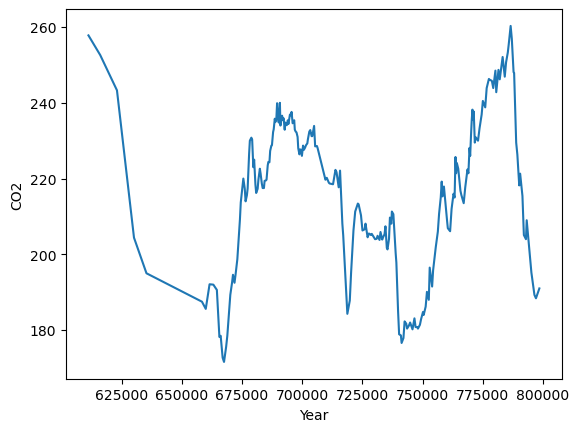

In [4]:
#plt.plot(x="Year",y="CO2")
sns.lineplot(data=df, x="Year", y="CO2")

In [5]:
df.dtypes

Depth (m)            float64
Year                   int64
CO2                  float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
dtype: object

In [6]:
df.describe()

,Depth (m),Year,CO2,sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
count,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


In [7]:
df.size

1729

In [8]:
df_comp = pd.read_excel('./41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name = 2, skiprows=range(0, 6))
df_comp

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


In [9]:
df_comp = df_comp.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df_comp

,Year,CO2
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


<AxesSubplot:xlabel='Year', ylabel='CO2'>

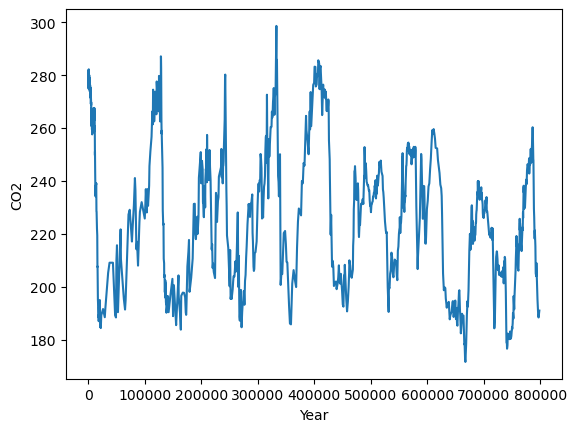

In [10]:
sns.lineplot(data=df_comp, x="Year", y="CO2", palette='coolwarm')

### Import dataset : Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [11]:
df1 = pd.read_excel('./epicaDC.deuttemp.EDC3-AICC.xlsx')
df1

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [12]:
df1.describe()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
count,5819.00000,5819.000000,5819.000000,5819.000000,5804.000000,5819.000000,5819.000000
mean,2910.00000,1599.950000,191800.948469,192715.210134,-417.742884,213.474721,2.044824
std,1679.94494,923.969717,193448.729761,195698.666350,17.949569,3.130075,0.678126
min,1.00000,0.000000,-50.000000,-55.000000,-450.100000,207.900000,1.096556
25%,1455.50000,799.975000,47540.535000,46505.000000,-432.300000,210.900000,1.508500
50%,2910.00000,1599.950000,123446.200000,121574.666700,-421.300000,212.900000,1.838000
75%,4364.50000,2399.925000,276835.550000,277050.500000,-403.200000,216.000000,2.514000
max,5819.00000,3199.900000,820093.900000,821838.000000,-361.200000,223.100000,4.641000


In [13]:
df1.size

40733

<AxesSubplot:xlabel='EDC3béta', ylabel='temp'>

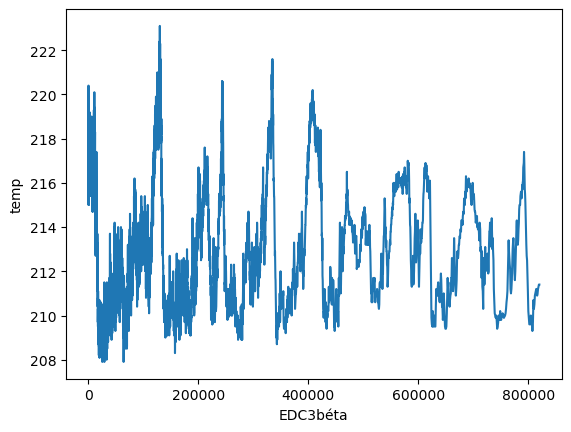

In [14]:
sns.lineplot(data=df1, x="EDC3béta", y="temp")

<AxesSubplot:xlabel='AICC2012', ylabel='temp'>

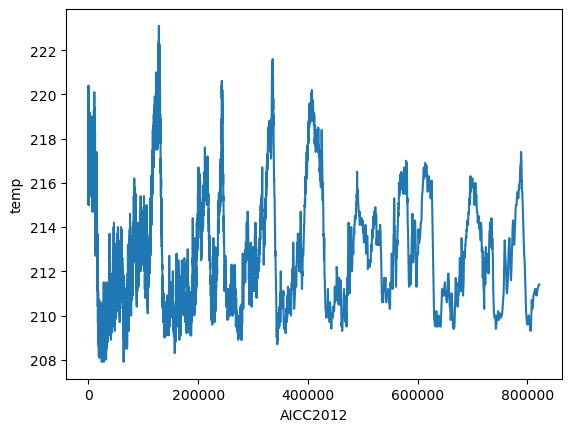

In [15]:
sns.lineplot(data=df1, x="AICC2012", y="temp")

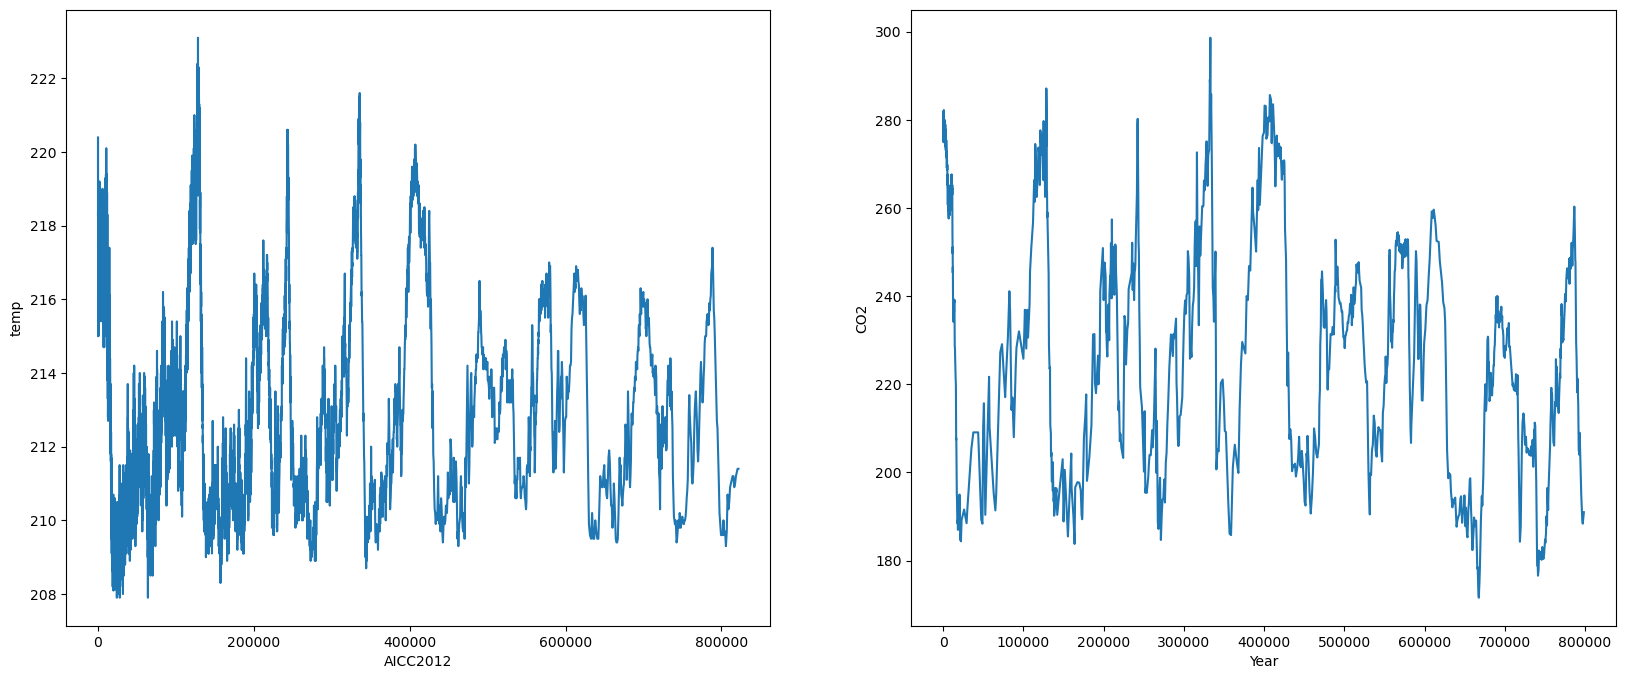

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax1)
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax2)
plt.show()

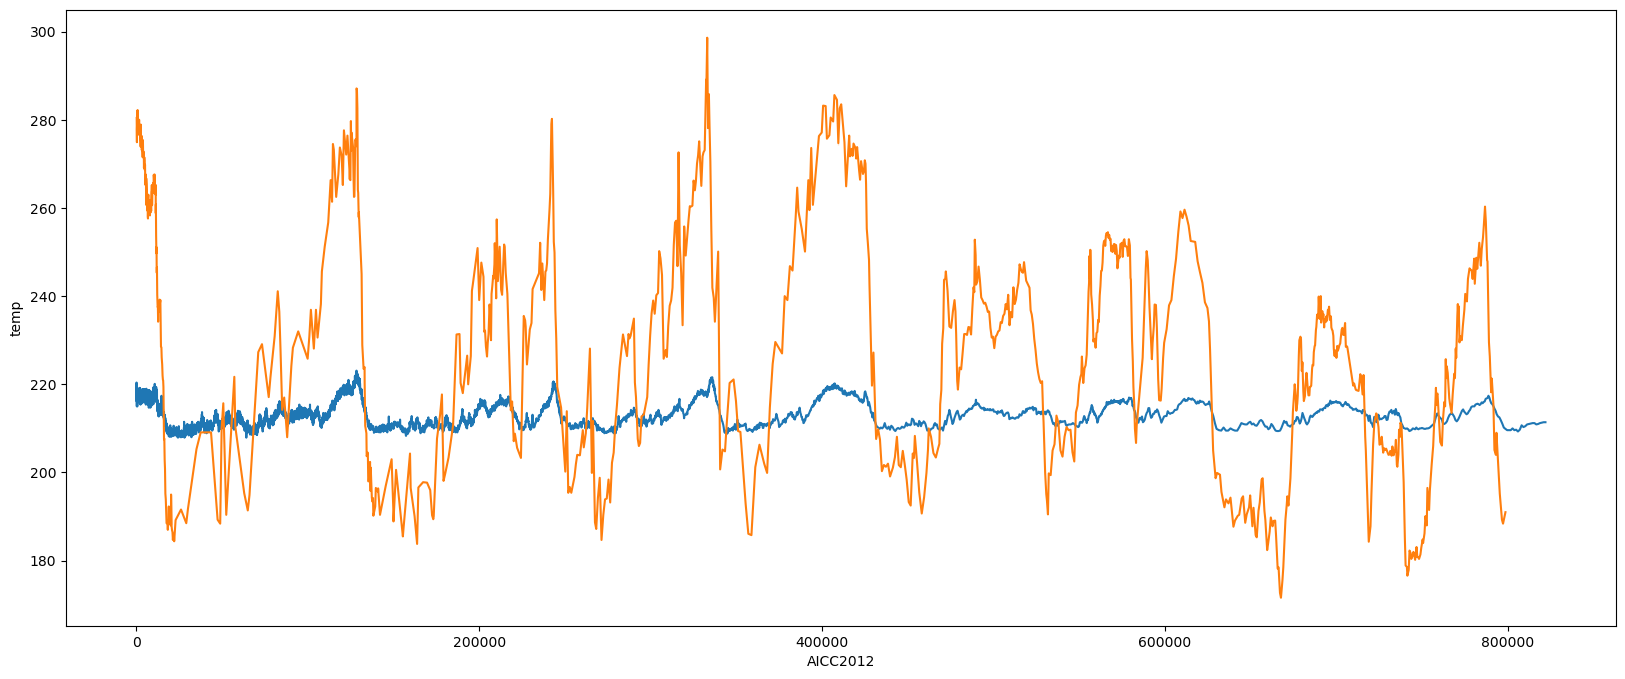

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax)
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax)
plt.show()

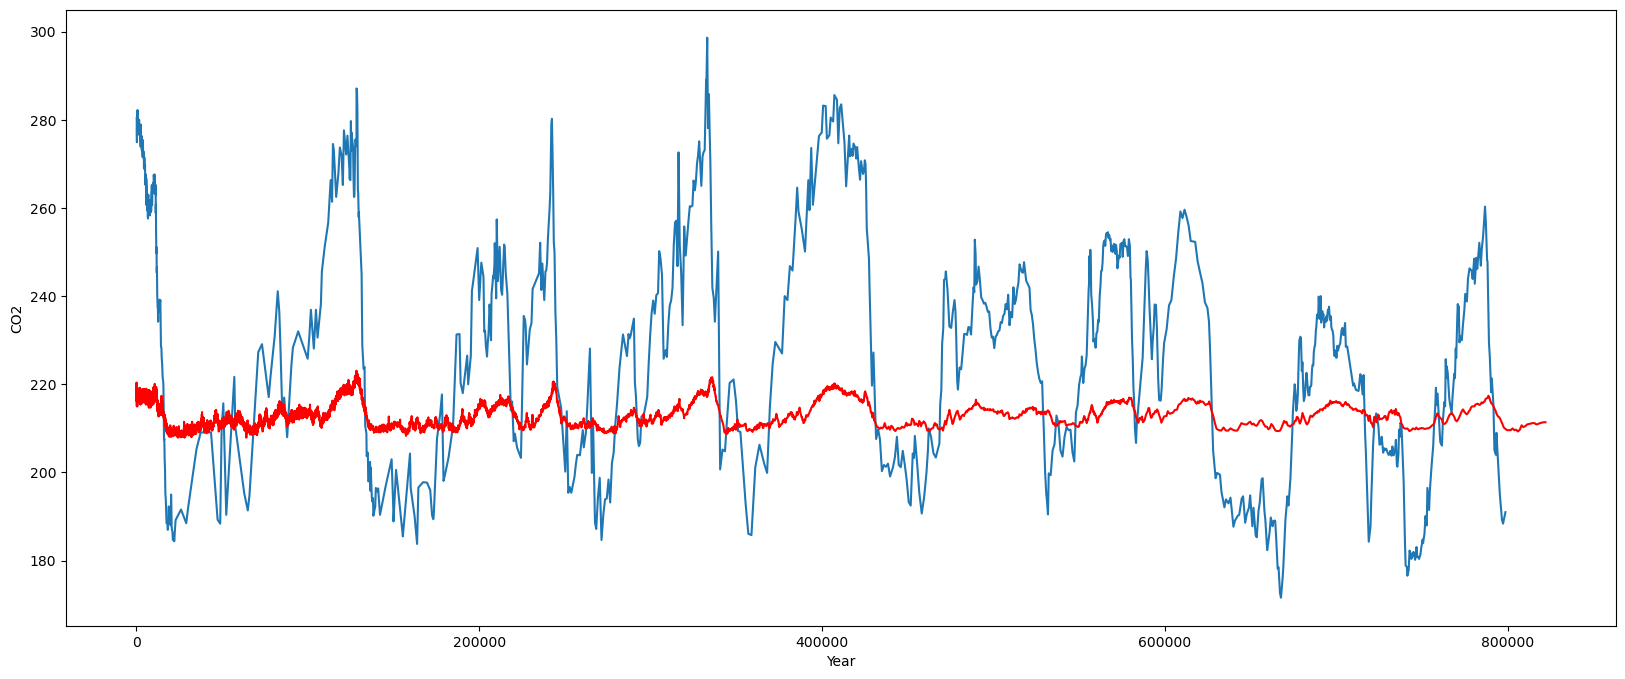

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax)
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax, color = "red")
plt.show()

In [19]:
df_comp["temp"] = df1.temp
df_comp

,Year,CO2,temp
0,137,280.4,218.3
1,268,274.9,218.3
2,279,277.9,218.3
3,395,279.1,218.3
4,404,281.9,218.3
...,...,...,...
1091,794608,199.4,209.0
1092,795202,195.2,209.3
1093,796467,189.3,209.5
1094,797099,188.4,209.2


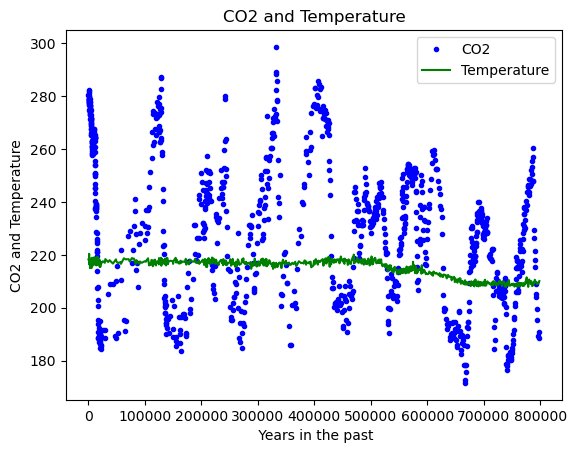

In [20]:
Year = df_comp.Year
CO2 = df_comp.CO2
temp = df_comp.temp

plt.plot(Year, CO2,'b.',label = 'CO2')
plt.plot(Year, temp, 'g-',label = "Temperature")

plt.title("CO2 and Temperature")
plt.ylabel("CO2 and Temperature")
plt.xlabel(" Years in the past")
plt.legend()
plt.show()